## Imports

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mog_experiment import *
plt.style.use('/Users/saforem2/.config/matplotlib/stylelib/ggplot_sam.mplstyle')
%matplotlib notebook
#%matplotlib inline
%autoreload 2

## Define data_dir and load data

In [3]:
run_dir = '../log_mog_tf/run135/'
data_dir = run_dir + 'run_info/'
figs_dir = run_dir + 'figures1/'
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [4]:
with open(data_dir + 'tunneling_rates.pkl', 'rb') as f:
    tunneling_rates = pickle.load(f)
with open(data_dir + 'acceptance_rates.pkl', 'rb') as f:
    acceptance_rates = pickle.load(f)
with open(data_dir + 'tunneling_rates_highT.pkl', 'rb') as f:
    tunneling_rates_highT = pickle.load(f)
with open(data_dir + 'acceptance_rates_highT.pkl', 'rb') as f:
    acceptance_rates_highT = pickle.load(f)
with open(data_dir + 'distances.pkl', 'rb') as f:
    distances = pickle.load(f)
with open(data_dir + 'distances_highT.pkl', 'rb') as f:
    distances_highT = pickle.load(f)

In [5]:
get_vals_as_arr = lambda _dict: np.array(list(_dict.values()))

tr0 = get_vals_as_arr(tunneling_rates)
tr1 = get_vals_as_arr(tunneling_rates_highT)

ar0 = get_vals_as_arr(acceptance_rates)
ar1 = get_vals_as_arr(acceptance_rates_highT)

d0 = get_vals_as_arr(distances)
d1 = get_vals_as_arr(distances_highT)

tunneling_rates_avg = tr0[:, 0]
tunneling_rates_err = tr0[:, 1]
tunneling_rates_avg_highT = tr1[:, 0]
tunneling_rates_err_highT = tr1[:, 1]

acceptance_rates_avg = ar0[:, 0]
acceptance_rates_err = ar0[:, 1]
acceptance_rates_avg_highT = ar1[:, 0]
acceptance_rates_err_highT = ar1[:, 1]

distances_avg = d0[:, 0]
distances_err = d0[:, 1]
distances_avg_highT = d1[:, 0]
distances_err_highT = d1[:, 1]

In [6]:
steps_arr = []
temp_arr = []
for key in tunneling_rates_highT.keys():
    steps_arr.append(key[0]+1)
    temp_arr.append(key[1])

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


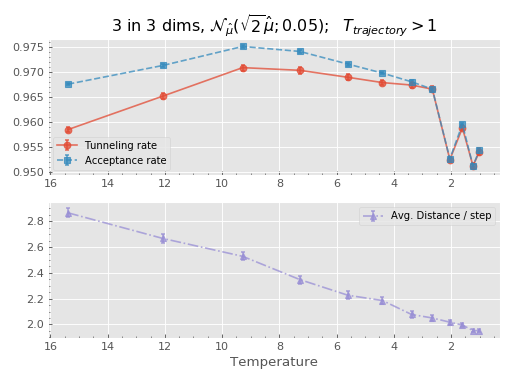

In [8]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(temp_arr, distances_avg_highT, yerr=distances_err_highT,
                 color='C2', marker='^', ls='-.', fillstyle='full',
                 label='Avg. Distance / step',
                 capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} > 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Temperature', fontsize=12)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
xlim = axes[1].set_xlim(axes[1].get_xlim()[::-1])
grid = axes[0].grid(True)
grid = axes[1].grid(True)

legend = axes[0].legend(loc='best', fontsize=9)
legend = axes[1].legend(loc='best', fontsize=9)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_temp_highT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


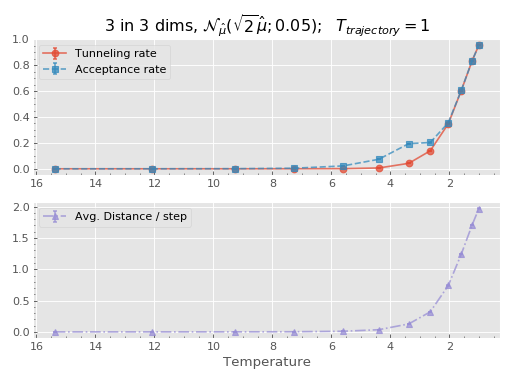

In [9]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='-', fillstyle='full',
                      label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                      color='C1', marker='s', ls='--', fillstyle='full',
                      label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(temp_arr, distances_avg, yerr=distances_err,
                       color='C2', marker='^', ls='-.', fillstyle='full',
                       label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Temperature', fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
xlim = axes[1].set_xlim(axes[1].get_xlim()[::-1])
grid = axes[0].grid(True)
grid = axes[1].grid(True)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_temp_lowT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


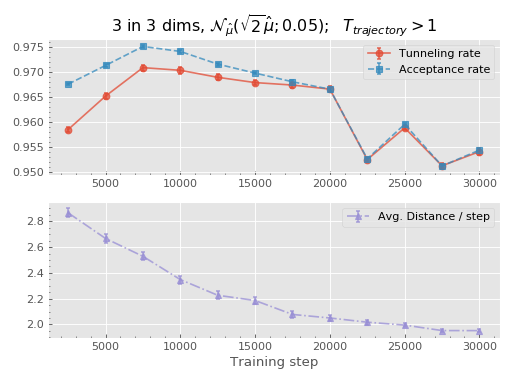

In [12]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, distances_avg_highT, yerr=distances_err_highT,
                 color='C2', marker='^', ls='-.', fillstyle='full',
                 label='Avg. Distance / step',
                 capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} > 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Training step',fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_step_highT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


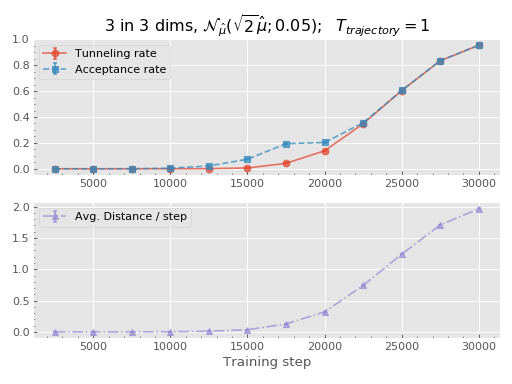

In [10]:
fig, axes = plt.subplots(2)
eb = axes[0].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='-', fillstyle='full',
                      label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb = axes[0].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                      color='C1', marker='s', ls='--', fillstyle='full',
                      label='Acceptance rate',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, distances_avg, yerr=distances_err,
                       color='C2', marker='^', ls='-.', fillstyle='full',
                       label='Avg. Distance / step',
                       capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = axes[0].set_title(title_str)#, fontsize=0)
xlabel = axes[1].set_xlabel('Training step',fontsize=12)
grid = axes[0].grid(True)
grid = axes[1].grid(True)
legend = axes[0].legend(loc='best', fontsize=10)
legend = axes[1].legend(loc='best', fontsize=10)
fig.tight_layout()
out_file = figs_dir + 'tr_ar_dist_vs_step_lowT.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


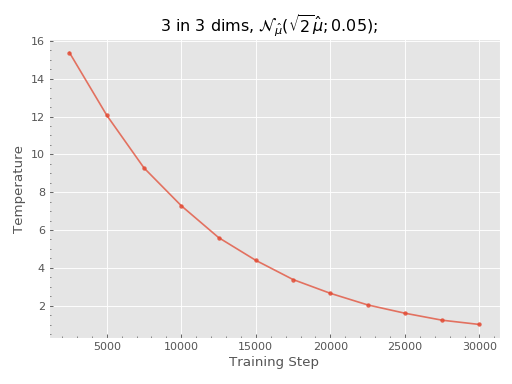

Text(0.5,0,'Training Step')

Text(0,0.5,'Temperature')

In [11]:
fig, ax = plt.subplots()
ax.plot(steps_arr, temp_arr, marker='.', ls='-', fillstyle='full', alpha=0.75)
ax.set_xlabel('Training Step')
ax.set_ylabel('Temperature')

str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1# + r'$T_{trajectory} = 1$'
title = ax.set_title(title_str)#, fontsize=0)
grid = ax.grid(True)
fig.tight_layout()
out_file = figs_dir + 'temperature_vs_training_step.pdf'
out_fig = plt.savefig(out_file,  dpi=400, bbox_inches='tight')

## LESS OLD

In [ ]:
#with plt.xkcd():
len_trajectory = 2000
fig, ax = plt.subplots()
eb0 = ax.errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = ax.errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = ax.errorbar(steps_arr, distances_avg, yerr=distances_err,
                 color='C2', marker='^', ls='-.', fillstyle='full',
                 label='Avg. Distance / step',
                 capsize=1.5, capthick=1.5, alpha=0.75)
#ax.axhline(y=1., color='slategrey', ls='-')
#ax.text(23500, 0.03, r'$T_{trajectory} = 1$', fontsize=20, color='C0')
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
#str1 = r' $(\hat\mu = 1, 2, 3)$;    '
title_str = str0 + str1 + r'$T_{trajectory} = 1$'

title = ax.set_title(title_str)#, fontsize=0)

xlabel = ax.set_xlabel('Training step')#, fontsize=12)
grid = ax.grid(True)

legend = ax.legend(loc='best', fontsize=9)
fig.tight_layout()
plt.show()
out_file = figs_dir + 'tunneling_rate_acceptance_rate_training_step_T1.pdf'
print(f'Saving figure to: {out_file}')
out_fig = plt.savefig(out_file, dpi=400, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
eb = ax.errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate',#, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                 color='C1', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = ax.errorbar(temp_arr, distances_avg, yerr=distances_err,
                 color='C2', marker='^', ls='-.', fillstyle='full',
                 label='Avg. Distance / step',
                 capsize=1.5, capthick=1.5, alpha=0.75)
str0 = (f"3 in 3 dims, ")
str1 = (r'$\mathcal{N}_{\hat \mu}(\sqrt{2}\hat \mu;$'
        + r'${{{0}}});$  '.format(0.05))
title_str = str0 + str1 + r'$T_{trajectory} = 1$'
title = ax.set_title(title_str)#, fontsize=0)

xlabel = ax.set_xlabel('Training temperature', fontsize=12)
xlim = ax.set_xlim(ax.get_xlim()[::-1])
grid = ax.grid(True)

legend = ax.legend(loc='best', fontsize=9)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_training_temp_T1.pdf', 
            dpi=400, bbox_inches='tight')
#plt.show()

## OLD

In [ ]:
fig, axes = plt.subplots(2)
eb = axes[1].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                      color='C0', marker='o', ls='-', fillstyle='full',
                      label='Tunneling rate',#, $T_{trajectory} = 1$',
                      capsize=1.5, capthick=1.5, alpha=0.75)
eb1 = axes[1].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                       color='C1', marker='s', ls='--', fillstyle='full',
                       label='Acceptance rate',
                       capsize=1.5, capthick=1.5, alpha=0.75)
title = axes[1].set_title(r'$T_{trajectory} = 1$', fontsize=20, color='C0')
xlabel = axes[1].set_xlabel('Training step', fontsize=12)
grid = axes[1].grid(True)
leg = axes[1].legend(loc='best', fontsize=10)

eb2 = axes[0].errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                       color='C0', marker='o', ls='-', fillstyle='full',
                       label='Tunneling rate',
                       capsize=1.5, capthick=1.5, alpha=0.75)
eb3 = axes[0].errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                       color='C1', marker='s', ls='--', fillstyle='full',
                       label='Acceptance rate',
                       capsize=1.5, capthick=1.5, alpha=0.75)
xlim = axes[0].set_xlim(axes[0].get_xlim()[::-1])
title = axes[0].set_title('$T_{trajectory} > 1$', fontsize=20, color='C1')
xlabel = axes[0].set_xlabel('Temperature', fontsize=12)
legend = axes[0].legend(loc='best', fontsize=10)
grid = axes[0].grid(True)
fig.tight_layout()
out_file = '/Users/saforem2/tunneling_rate_acceptance_rate_both1.png' 
print(f'Saving figure to: {out_file}')
out_fig = plt.savefig(out_file, dpi=400, bbox_inches='tight')

In [ ]:
fig, axes = plt.subplots(2,2)
fig.subplots_adjust(wspace=0.3, hspace=0.5)

eb00 = axes[0][1].errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           label='Tunneling rate',#, $T_{trajectory} = 1$',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb01 = axes[0][1].errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
xlab = axes[0][1].set_xlabel('Training step')#, fontsize=12)
tit = axes[0][1].set_title('$T_{trajectory} = 1$', color='C0')# fontsize=20, color='C0')#, y=1.15)
grid = axes[0][1].grid(True)
#leg0 = axes[0][1].legend(loc='best', fontsize=8)

eb10 = axes[1][1].errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           label='Tunneling rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb11 = axes[1][1].errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb12 = axes[1][1].set_xlim(axes[1][1].get_xlim()[::-1])
xlab = axes[1][1].set_xlabel('Temperature')#, fontsize=12)
#leg = axes[1][1].legend(loc='best', fontsize=8)
grid = axes[1][1].grid(True)

eb12 = axes[0][0].errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           label='Tunneling rate',#, $T_{trajectory} = 1$',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb13 = axes[0][0].errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
xlab = axes[0][0].set_xlabel('Training step')#, fontsize=12)
tit = axes[0][0].set_title('$T_{trajectory} > 1$', color='C1')#, fontsize=20, color='C1')#, y=1.15)
grid = axes[0][0].grid(True)
leg = axes[0][0].legend(loc='best', fontsize=8)

eb22 = axes[1][0].errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                           color='C0', marker='o', ls='-', fillstyle='full',
                           #label='Tunneling rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb23 = axes[1][0].errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                           color='C1', marker='s', ls='--', fillstyle='full',
                           #label='Acceptance rate',
                           capsize=1.5, capthick=1.5, alpha=0.75)
eb33 = axes[1][0].set_xlim(axes[1][0].get_xlim()[::-1])
_ = axes[1][0].set_xlabel('Temperature')#, fontsize=12)
#_ = axes[1][0].legend(loc='best', fontsize=8)
_ = axes[1][0].grid(True)
#_ = fig.legend(loc='best', fontsize=8)
#_ = fig.legend(bbox_to_anchor=(0.62, 0.52), borderaxespad=0., fontsize=9)

out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_all.pdf',
            dpi=400, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots()
eb = ax.errorbar(temp_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 color='C0', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
            color='C1', marker='s', ls='--', fillstyle='full',
            label='Acceptance rate, $T_{trajectory} = 1$',
            capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 color='C2', marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(temp_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 color='C3', marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
xlabel = ax.set_xlabel('Temperature', fontsize=12)
xlim = ax.set_xlim(ax.get_xlim()[::-1])
legend = ax.legend(loc='best')#, fontsize=9)#, alpha=0.6)
plt.grid(True)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_vs_temp_all1.pdf', 
            dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
fig, ax = plt.subplots()
eb = ax.errorbar(steps_arr, tunneling_rates_avg, yerr=tunneling_rates_err,
                 #color='C0', 
                 marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, acceptance_rates_avg, yerr=acceptance_rates_err,
                 #color='C1', 
                 marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate, $T_{trajectory} = 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, tunneling_rates_avg_highT, yerr=tunneling_rates_err_highT,
                 #color='C2', 
                 marker='o', ls='-', fillstyle='full',
                 label='Tunneling rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
eb = ax.errorbar(steps_arr, acceptance_rates_avg_highT, yerr=acceptance_rates_err_highT,
                 #color='C3', 
                 marker='s', ls='--', fillstyle='full',
                 label='Acceptance rate, $T_{trajectory} > 1$',
                 capsize=1.5, capthick=1.5, alpha=0.75)
xlabel = ax.set_xlabel('Training step')#, fontsize=12)
ax.grid(True)
#xlim = ax.set_xlim(ax.get_xlim()[::-1])
legend = ax.legend(loc='best')#, fontsize=9)#, fontsize=9)#, alpha=0.6)
fig.tight_layout()
out_fig = plt.savefig(figs_dir + 'tunneling_rate_acceptance_rate_vs_step_all1.pdf', 
            dpi=400, bbox_inches='tight')
plt.show()